# Cleaning Data - Part 1, Air Pollution

The bulk of a data scientists job is the collection and cleaning of data. The cleaning step is a hugely important one, as it also provides the data scientist an opportunity to better understand the data as well as an opportunity to shape the data in the way they see fit.

This notebook will go over the following concepts:

- Handling missing data
    - How to find missing data
    - Dealing with missing data on data import
    - Imputing values
- Find outliers in continuous and categorical data
    - Histograms and boxplots
- Duplicate data
    - How to find duplicates
    - Handling duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', 500)

## Import Data

In [2]:
pollution = pd.read_csv('pollution_data.csv', encoding='unicode_escape')

In [3]:
pollution.head()

,Source.Name,Site,Parameter,Date (LST),Year,Month,Day,Hour,Date Key,Value,Unit,AQI,Duration,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,Ulaanbaatar_ HourlyPM25_201607.CSV,Ulaanbaatar,2/5/2018 12:00,7/1/2016 0:00,2016,7,1,0,2.020000e+11,0.031,mg/mÂ³,91.0,1 Hr,442920.0,99999.0,2.020000e+11,60.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56.0,43.0,1011.4,NaN,865.7,NaN,49.0,NaN,NaN,NaN,NaN,NaN
1,Ulaanbaatar_ HourlyPM25_201607.CSV,Ulaanbaatar,2/5/2018 12:00,7/1/2016 1:00,2016,7,1,1,2.020000e+11,0.030,mg/mÂ³,89.0,1 Hr,442920.0,99999.0,2.020000e+11,990.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,43.0,NaN,29.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ulaanbaatar_ HourlyPM25_201607.CSV,Ulaanbaatar,2/5/2018 12:00,7/1/2016 2:00,2016,7,1,2,2.020000e+11,0.020,mg/mÂ³,68.0,1 Hr,442920.0,99999.0,2.020000e+11,990.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,43.0,NaN,29.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ulaanbaatar_ HourlyPM25_201607.CSV,Ulaanbaatar,2/5/2018 12:00,7/1/2016 3:00,2016,7,1,3,2.020000e+11,0.021,mg/mÂ³,70.0,1 Hr,442920.0,99999.0,2.020000e+11,110.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,31.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,39.0,1005.2,NaN,864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ulaanbaatar_ HourlyPM25_201607.CSV,Ulaanbaatar,2/5/2018 12:00,7/1/2016 4:00,2016,7,1,4,2.020000e+11,0.018,mg/mÂ³,63.0,1 Hr,442920.0,99999.0,2.020000e+11,990.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,37.0,NaN,29.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data

When running most plotting functions, NaN values will cause errors or undesired behavior. As such we should explore our dataset and understand the missing data in our dataframe.

In [4]:
pollution.isnull()

,Source.Name,Site,Parameter,Date (LST),Year,Month,Day,Hour,Date Key,Value,Unit,AQI,Duration,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,False,False,False,False,True,False,True,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,True,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19611,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19612,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19613,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [5]:
pollution.isnull().any()

Source.Name    False
Site           False
Parameter      False
Date (LST)     False
Year           False
Month          False
Day            False
Hour           False
Date Key       False
Value           True
Unit           False
AQI             True
Duration       False
USAF            True
WBAN            True
Date Key.1      True
DIR             True
SPD             True
GUS             True
CLG             True
SKC             True
L               True
M               True
H               True
VSB             True
MW              True
MW_1            True
MW_2            True
MW_3            True
AW              True
AW_4            True
AW_5            True
AW_6            True
W               True
TEMP            True
DEWP            True
SLP             True
ALT             True
STP             True
MAX             True
MIN             True
PCP01           True
PCP06           True
PCP24           True
PCPXX           True
SD              True
dtype: bool

In [6]:
pollution.shape

(19615, 46)

In [7]:
pollution.isnull().sum()

Source.Name        0
Site               0
Parameter          0
Date (LST)         0
Year               0
Month              0
Day                0
Hour               0
Date Key           0
Value            936
Unit               0
AQI              936
Duration           0
USAF              99
WBAN              99
Date Key.1        99
DIR             4360
SPD             1878
GUS            19232
CLG             9915
SKC            14721
L              19615
M              19615
H              19615
VSB             5501
MW             13820
MW_1           19318
MW_2           19615
MW_3           19615
AW             19615
AW_4           19615
AW_5           19615
AW_6           19615
W              16206
TEMP             118
DEWP             119
SLP            13123
ALT             2475
STP            17245
MAX            18879
MIN            19058
PCP01          19615
PCP06          19615
PCP24          19615
PCPXX          19261
SD             19221
dtype: int64

In [8]:
pollution.isnull().sum().sum()

451999

### How to handle NaN values

Exploring the df.dropna() method.

In [9]:
pollution.dropna()

,Source.Name,Site,Parameter,Date (LST),Year,Month,Day,Hour,Date Key,Value,Unit,AQI,Duration,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD


In [10]:
pollution = pollution.dropna(subset=['Value'])

In [11]:
pollution.shape

(18679, 46)

Exploring the df.fillna() method

In [12]:
pollution['TEMP'].mean()

27.053209823352002

In [13]:
pollution['TEMP'].isnull().sum()

111

In [14]:
pollution['TEMP'].fillna(value=pollution['TEMP'].mean())

0        56.00000
1        59.00000
2        64.00000
3        71.00000
4        73.00000
           ...   
19610    27.05321
19611    27.05321
19612    27.05321
19613    27.05321
19614    27.05321
Name: TEMP, Length: 18679, dtype: float64

In [15]:
pollution.index = pd.to_datetime(pollution['Date (LST)'])

In [16]:
pollution = pollution.rename(columns={'Date (LST)':'Date'})

In [17]:
pollution = pollution.sort_values('Date (LST)')

In [18]:
pollution['TEMP'].fillna(method='ffill', limit=1).isna().sum()

51

## Outliers

In [19]:
pollution.head()

,Source.Name,Site,Parameter,Date,Year,Month,Day,Hour,Date Key,Value,Unit,AQI,Duration,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
Date (LST),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-01 00:00:00,Ulaanbaatar_ HourlyPM25_201510.CSV,Ulaanbaatar,2/5/2018 12:00,10/1/2015 0:00,2015,1,1,0,2.020000e+11,0.176,mg/m³,50.0,1 Hr,442920.0,99999.0,2.020000e+11,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,12.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,35.0,23.0,1022.4,30.00,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
2015-10-01 01:00:00,Ulaanbaatar_ HourlyPM25_201510.CSV,Ulaanbaatar,2/5/2018 12:00,10/1/2015 1:00,2015,1,1,1,2.020000e+11,0.071,mg/m³,60.0,1 Hr,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,250.0,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 02:00:00,Ulaanbaatar_ HourlyPM25_201510.CSV,Ulaanbaatar,2/5/2018 12:00,10/1/2015 2:00,2015,1,1,2,2.020000e+11,0.077,mg/m³,70.0,1 Hr,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 03:00:00,Ulaanbaatar_ HourlyPM25_201510.CSV,Ulaanbaatar,2/5/2018 12:00,10/1/2015 3:00,2015,1,1,3,2.020000e+11,0.058,mg/m³,80.0,1 Hr,442920.0,99999.0,2.020000e+11,210.0,4.0,NaN,NaN,BKN,NaN,NaN,NaN,31.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,29.0,1017.0,NaN,867.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 04:00:00,Ulaanbaatar_ HourlyPM25_201510.CSV,Ulaanbaatar,2/5/2018 12:00,10/1/2015 4:00,2015,1,1,4,2.020000e+11,0.056,mg/m³,90.0,1 Hr,442920.0,99999.0,2.020000e+11,990.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,30.0,NaN,29.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pollution = pollution.drop(columns=['Source.Name','Site','Duration'])

In [21]:
pollution.dtypes

Parameter      object
Date           object
Year            int64
Month           int64
Day             int64
Hour            int64
Date Key      float64
Value         float64
Unit           object
AQI           float64
USAF          float64
WBAN          float64
Date Key.1    float64
DIR           float64
SPD           float64
GUS           float64
CLG           float64
SKC            object
L             float64
M             float64
H             float64
VSB           float64
MW            float64
MW_1          float64
MW_2          float64
MW_3          float64
AW            float64
AW_4          float64
AW_5          float64
AW_6          float64
W             float64
TEMP          float64
DEWP          float64
SLP           float64
ALT           float64
STP           float64
MAX           float64
MIN           float64
PCP01         float64
PCP06         float64
PCP24         float64
PCPXX         float64
SD             object
dtype: object

In [22]:
pollution['SKC'].unique()

array([nan, 'BKN', 'SCT', 'CLR', 'OVC', 'OBS'], dtype=object)

<AxesSubplot:>

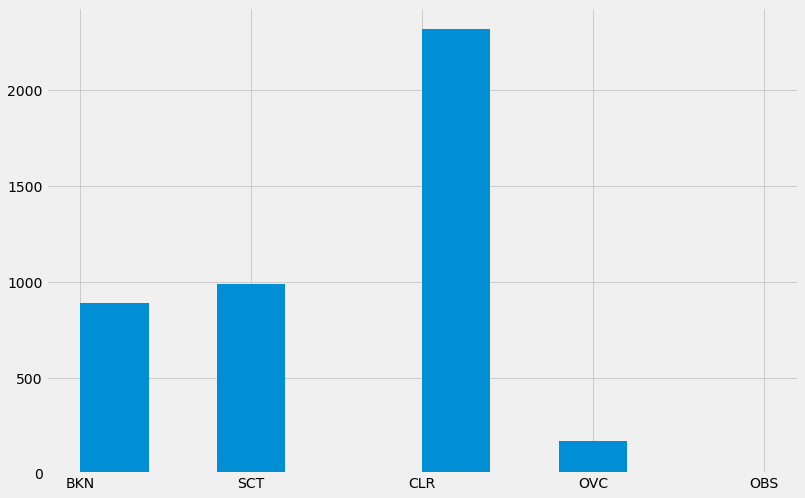

In [23]:
pollution['SKC'].hist()

In [24]:
pollution['SKC'] = pollution['SKC'].map({'CLR':1,'OVC':2,'SCT':3,'BKN':4,'OBS':5})

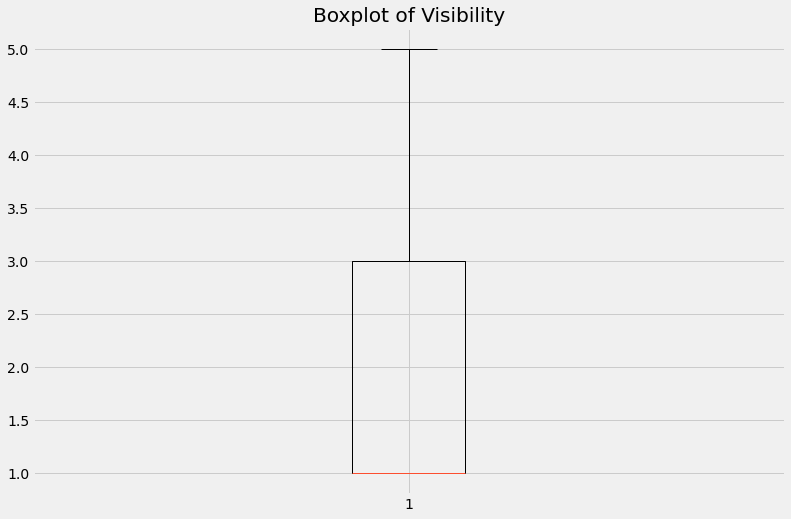

In [25]:
plt.boxplot(pollution['SKC'].dropna())
plt.title('Boxplot of Visibility')
plt.show()

In [26]:
pollution.dtypes

Parameter      object
Date           object
Year            int64
Month           int64
Day             int64
Hour            int64
Date Key      float64
Value         float64
Unit           object
AQI           float64
USAF          float64
WBAN          float64
Date Key.1    float64
DIR           float64
SPD           float64
GUS           float64
CLG           float64
SKC           float64
L             float64
M             float64
H             float64
VSB           float64
MW            float64
MW_1          float64
MW_2          float64
MW_3          float64
AW            float64
AW_4          float64
AW_5          float64
AW_6          float64
W             float64
TEMP          float64
DEWP          float64
SLP           float64
ALT           float64
STP           float64
MAX           float64
MIN           float64
PCP01         float64
PCP06         float64
PCP24         float64
PCPXX         float64
SD             object
dtype: object

In [27]:
pollution['Date'] = pd.to_datetime(pollution['Date'])

In [28]:
pollution.dtypes

Parameter             object
Date          datetime64[ns]
Year                   int64
Month                  int64
Day                    int64
Hour                   int64
Date Key             float64
Value                float64
Unit                  object
AQI                  float64
USAF                 float64
WBAN                 float64
Date Key.1           float64
DIR                  float64
SPD                  float64
GUS                  float64
CLG                  float64
SKC                  float64
L                    float64
M                    float64
H                    float64
VSB                  float64
MW                   float64
MW_1                 float64
MW_2                 float64
MW_3                 float64
AW                   float64
AW_4                 float64
AW_5                 float64
AW_6                 float64
W                    float64
TEMP                 float64
DEWP                 float64
SLP                  float64
ALT           

In [29]:
pollution.describe()

,Year,Month,Day,Hour,Date Key,Value,AQI,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX
count,18679.000000,18679.000000,18679.000000,18679.000000,1.867900e+04,18679.000000,18679.000000,18585.0,18585.0,1.858500e+04,14603.000000,16912.000000,381.000000,9082.000000,4371.000000,0.0,0.0,0.0,13352.000000,5277.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,3179.000000,18568.000000,18566.000000,6185.000000,16322.000000,2257.000000,701.000000,531.000000,0.0,0.0,0.0,344.000000
mean,2016.421329,6.695594,15.622303,11.566251,2.020000e+11,0.073586,122.589914,442920.0,99999.0,2.020000e+11,593.653359,5.546535,28.826772,295.061110,2.104553,NaN,NaN,NaN,7.192114,20.640326,18.275000,NaN,NaN,NaN,NaN,NaN,NaN,2.467128,27.053210,12.812507,1024.662247,30.025582,869.156136,37.952924,29.602637,NaN,NaN,NaN,0.065465
std,0.697929,3.647296,8.796818,6.892882,0.000000e+00,0.105740,107.689837,0.0,0.0,0.000000e+00,390.738170,5.222184,6.606330,297.274837,1.252112,NaN,NaN,NaN,7.132246,28.579237,17.130934,NaN,NaN,NaN,NaN,NaN,NaN,2.918837,30.651379,24.501731,15.233688,0.228136,6.506207,28.130244,23.833667,NaN,NaN,NaN,0.170463
min,2015.000000,1.000000,1.000000,0.000000,2.020000e+11,-0.012000,-50.000000,442920.0,99999.0,2.020000e+11,10.000000,0.000000,16.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-42.000000,-49.000000,989.900000,29.290000,850.600000,-16.000000,-27.000000,NaN,NaN,NaN,0.000000
25%,2016.000000,3.000000,8.000000,6.000000,2.020000e+11,0.013000,53.000000,442920.0,99999.0,2.020000e+11,220.000000,2.000000,25.000000,33.000000,1.000000,NaN,NaN,NaN,3.800000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-8.000000,1012.200000,29.850000,864.400000,12.000000,13.500000,NaN,NaN,NaN,0.000000
50%,2016.000000,7.000000,16.000000,12.000000,2.020000e+11,0.028000,84.000000,442920.0,99999.0,2.020000e+11,350.000000,4.000000,29.000000,100.000000,1.000000,NaN,NaN,NaN,6.200000,4.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,28.000000,14.000000,1024.100000,30.030000,869.000000,37.000000,32.000000,NaN,NaN,NaN,0.010000
75%,2017.000000,10.000000,23.000000,18.000000,2.020000e+11,0.086000,167.000000,442920.0,99999.0,2.020000e+11,990.000000,9.000000,34.000000,722.000000,3.000000,NaN,NaN,NaN,6.200000,31.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,53.000000,32.000000,1036.600000,30.180000,873.400000,62.000000,48.000000,NaN,NaN,NaN,0.040000
max,2018.000000,12.000000,31.000000,23.000000,2.020000e+11,0.995000,996.000000,442920.0,99999.0,2.020000e+11,990.000000,40.000000,51.000000,722.000000,5.000000,NaN,NaN,NaN,31.200000,95.000000,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,99.000000,64.000000,1069.300000,30.830000,890.200000,98.000000,72.000000,NaN,NaN,NaN,1.810000


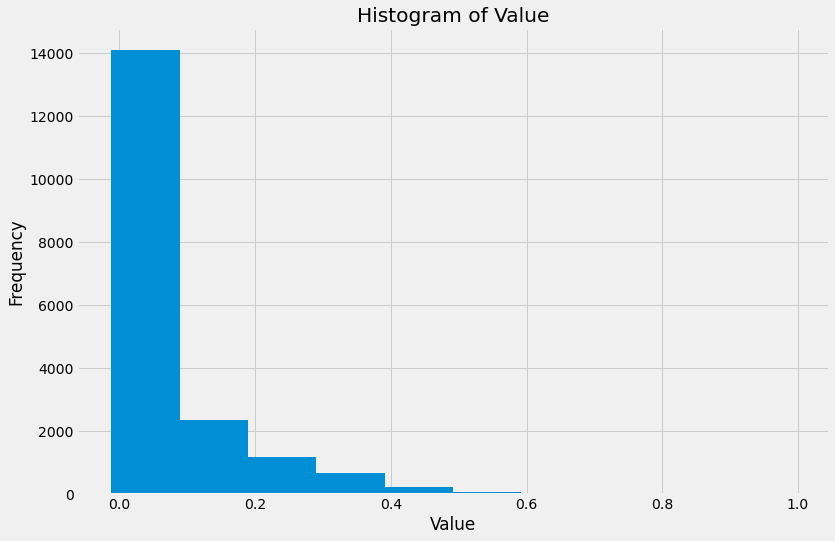

In [30]:
plt.hist(pollution['Value'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

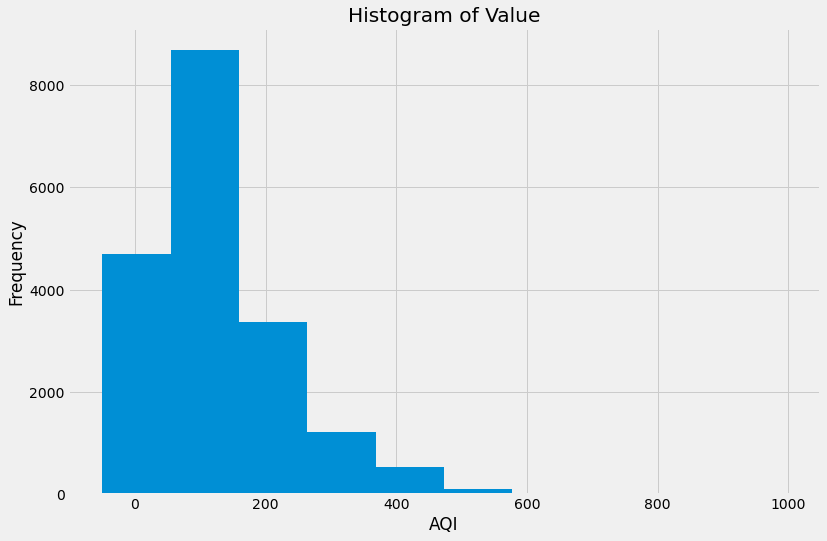

In [31]:
plt.hist(pollution['AQI'])
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

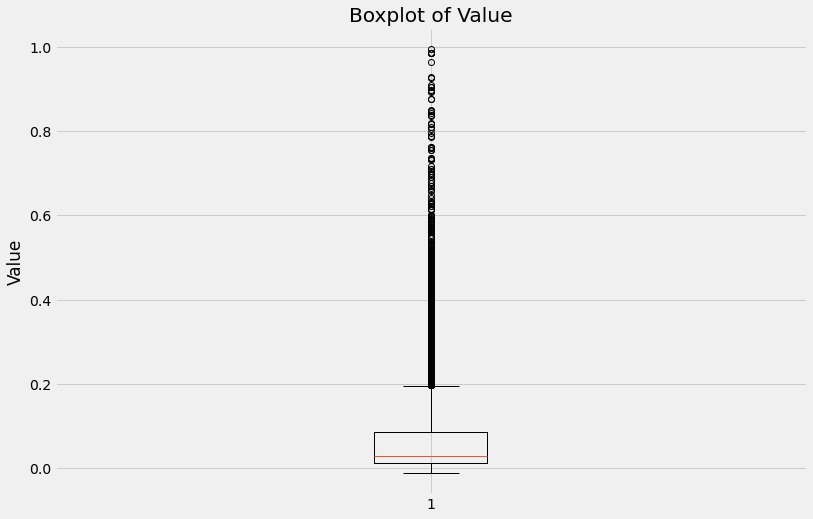

In [32]:
plt.boxplot(pollution['Value'])
plt.ylabel('Value')
plt.title('Boxplot of Value')
plt.show()

In [33]:
pollution[pollution['Value'] >= .6].shape

(70, 43)

In [34]:
pollution1 = pollution[pollution['Value'] < .6]

In [35]:
pollution1.shape

(18609, 43)

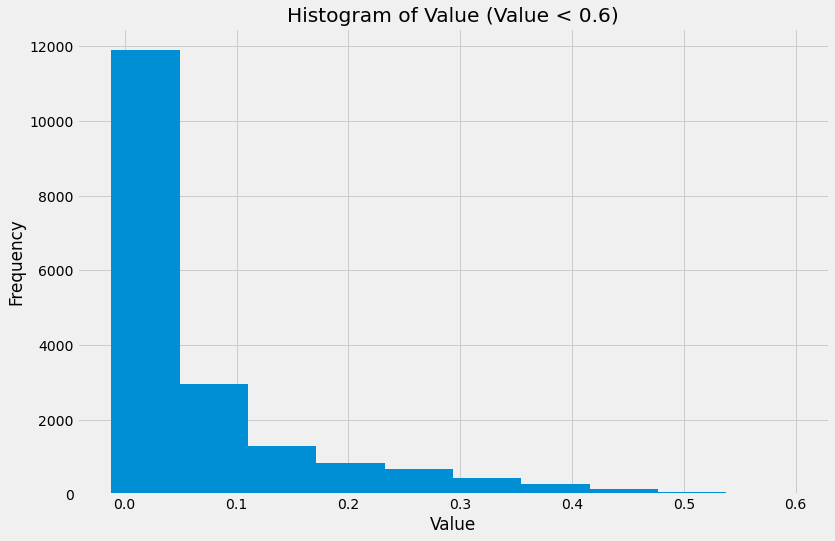

In [36]:
plt.hist(pollution1['Value'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value (Value < 0.6)')
plt.show()

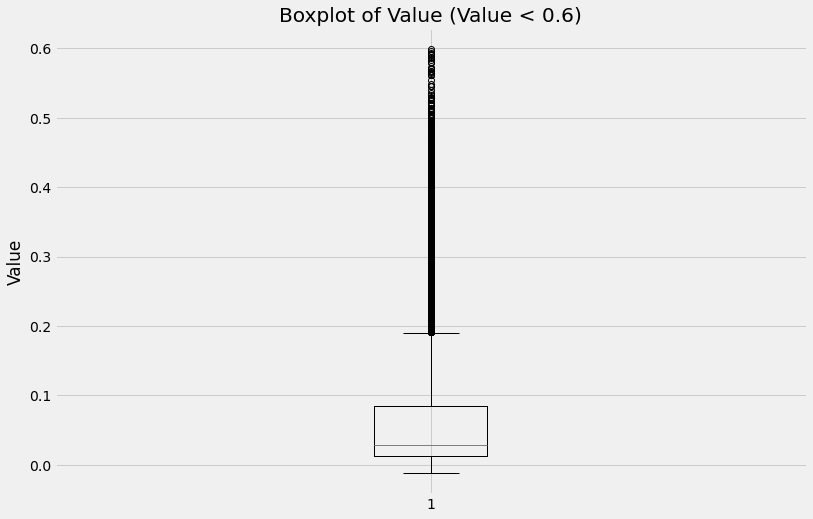

In [37]:
plt.boxplot(pollution1['Value'])
plt.ylabel('Value')
plt.title('Boxplot of Value (Value < 0.6)')
plt.show()

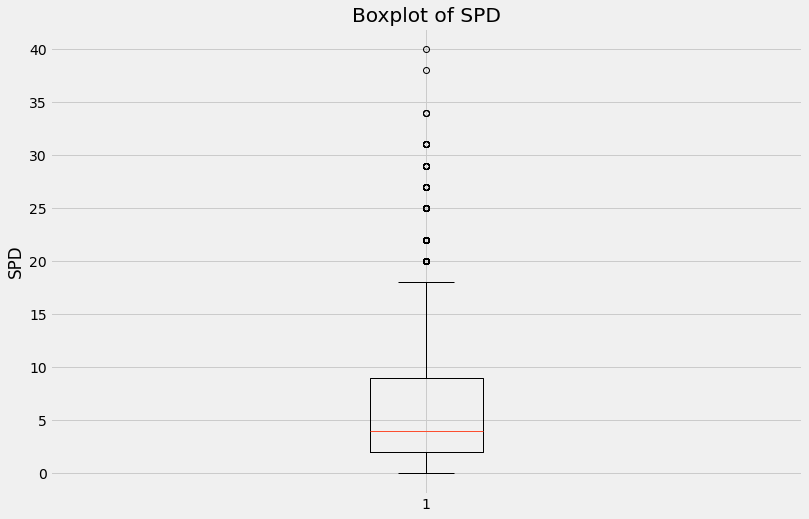

In [38]:
plt.boxplot(pollution1['SPD'].dropna())
plt.ylabel('SPD')
plt.title('Boxplot of SPD')
plt.show()

### What to do with outliers?
1. Drop them
2. Limit them
3. Assign new value
4. Transformation

#### 1. Drop them

In [39]:
pollution[pollution['Value'] <= .6]

,Parameter,Date,Year,Month,Day,Hour,Date Key,Value,Unit,AQI,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
Date (LST),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-01 00:00:00,2/5/2018 12:00,2015-10-01 00:00:00,2015,1,1,0,2.020000e+11,0.176,mg/m³,50.0,442920.0,99999.0,2.020000e+11,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,12.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,35.0,23.0,1022.4,30.00,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
2015-10-01 01:00:00,2/5/2018 12:00,2015-10-01 01:00:00,2015,1,1,1,2.020000e+11,0.071,mg/m³,60.0,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,250.0,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 02:00:00,2/5/2018 12:00,2015-10-01 02:00:00,2015,1,1,2,2.020000e+11,0.077,mg/m³,70.0,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 03:00:00,2/5/2018 12:00,2015-10-01 03:00:00,2015,1,1,3,2.020000e+11,0.058,mg/m³,80.0,442920.0,99999.0,2.020000e+11,210.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,31.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,29.0,1017.0,NaN,867.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01 04:00:00,2/5/2018 12:00,2015-10-01 04:00:00,2015,1,1,4,2.020000e+11,0.056,mg/m³,90.0,442920.0,99999.0,2.020000e+11,990.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,30.0,NaN,29.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 19:00:00,2/5/2018 12:00,2018-01-31 19:00:00,2018,1,31,19,2.020000e+11,0.010,mg/mÂ³,42.0,442920.0,99999.0,2.020000e+11,990.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,-22.0,NaN,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31 20:00:00,2/5/2018 12:00,2018-01-31 20:00:00,2018,1,31,20,2.020000e+11,0.011,mg/mÂ³,46.0,442920.0,99999.0,2.020000e+11,990.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.0,-29.0,NaN,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31 21:00:00,2/5/2018 12:00,2018-01-31 21:00:00,2018,1,31,21,2.020000e+11,0.009,mg/mÂ³,38.0,442920.0,99999.0,2.020000e+11,170.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.0,-33.0,1047.6,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Limit them (Also called "clipping")

In [40]:
pollution['Value'] = pollution['Value'].clip(upper=0.6, lower=0)

In [41]:
pollution['Value'].max()

0.6

#### 3. Assign new value

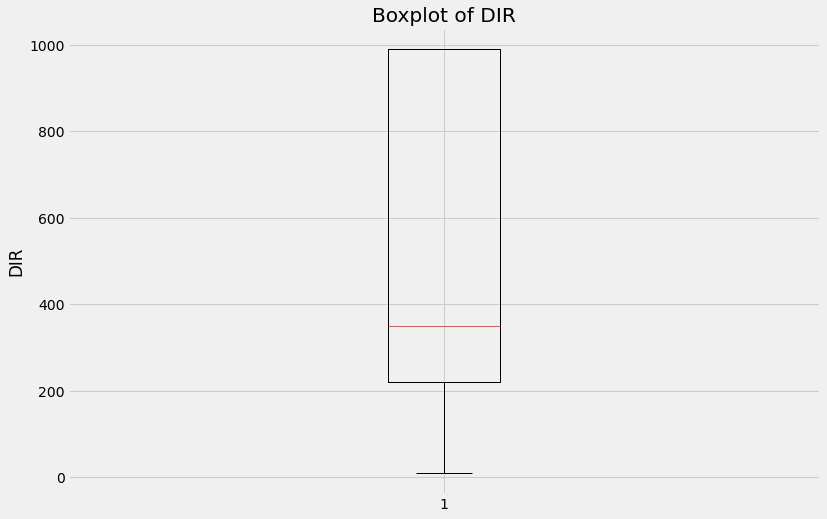

In [42]:
plt.boxplot(pollution['DIR'].dropna())
plt.ylabel('DIR')
plt.title('Boxplot of DIR')
plt.show()

In [43]:
pollution['DIR'].unique()

array([ nan, 210., 990., 270., 250., 300., 290., 350., 280., 310., 160.,
        80., 190., 240., 220., 170., 330., 340., 320., 180., 130., 140.,
        70.,  30.,  40., 150., 200., 360.,  50., 120., 260.,  90.,  60.,
       100.,  10., 230., 110.,  20.])

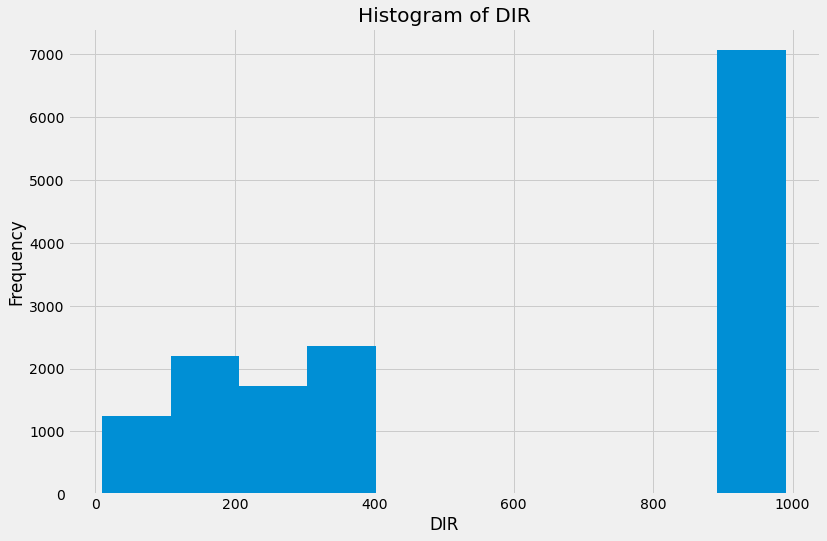

In [44]:
plt.hist(pollution['DIR'].dropna())
plt.xlabel('DIR')
plt.ylabel('Frequency')
plt.title('Histogram of DIR')
plt.show()

In [45]:
pollution['DIR'] = pollution['DIR'].replace(to_replace=990, value=0)

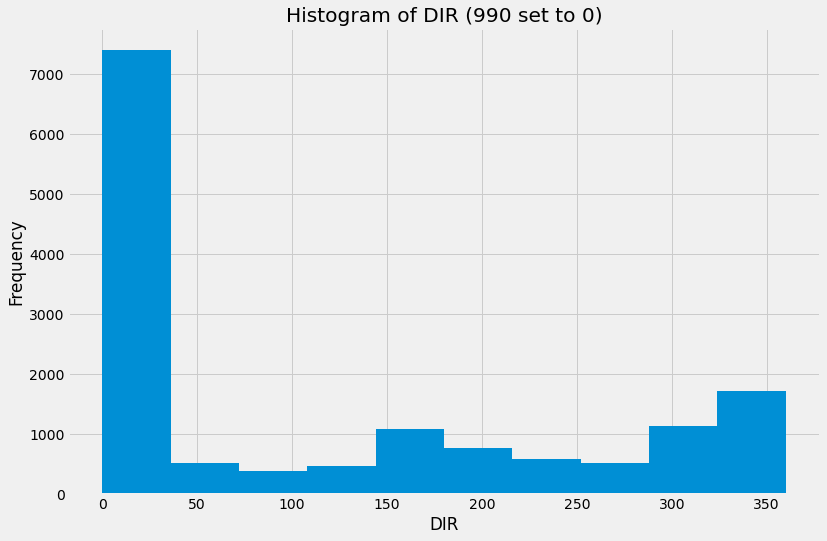

In [46]:
plt.hist(pollution['DIR'].dropna())
plt.xlabel('DIR')
plt.ylabel('Frequency')
plt.title('Histogram of DIR (990 set to 0)')
plt.show()

#### 4. Transformation

**Log Transformation**
`np.log(df['series'].replace(0, np.nan))`

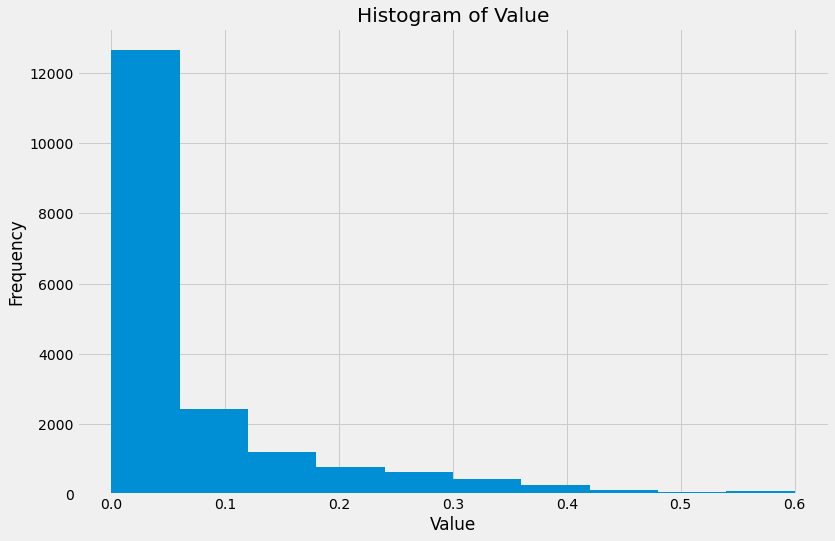

In [47]:
plt.hist(pollution['Value'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

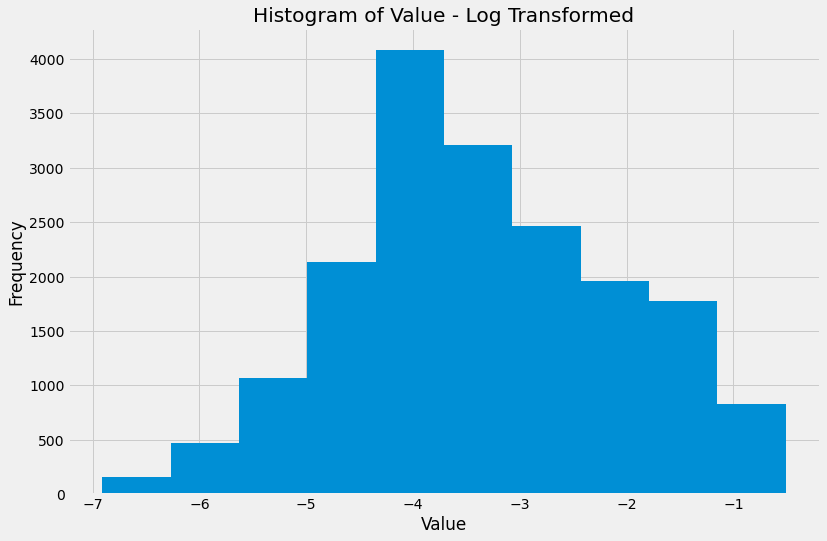

In [48]:
plt.hist(np.log(pollution['Value'].replace(0, np.nan)))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Log Transformed')
plt.show()

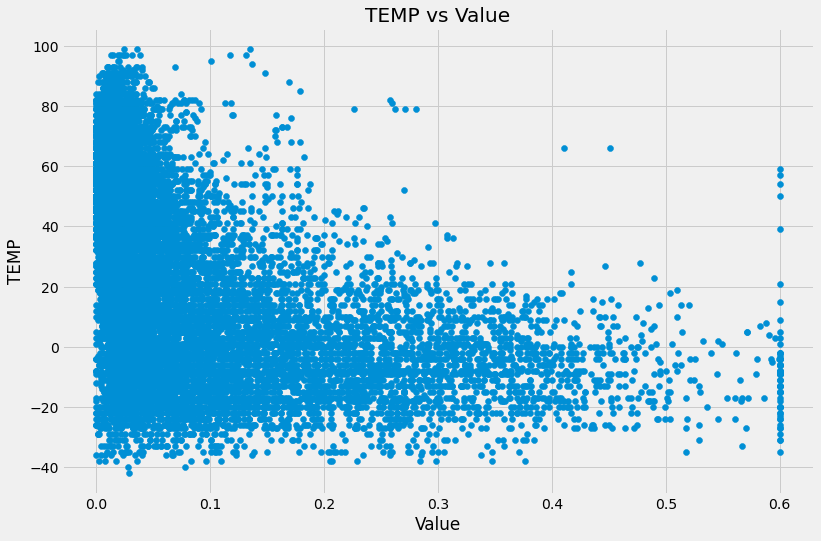

In [49]:
plt.scatter(pollution['Value'], pollution['TEMP'])
plt.ylabel('TEMP')
plt.xlabel('Value')
plt.title('TEMP vs Value')
plt.show()

**Normalization**

Mean Normalization
`normalized_df=(df-df.mean())/df.std()`

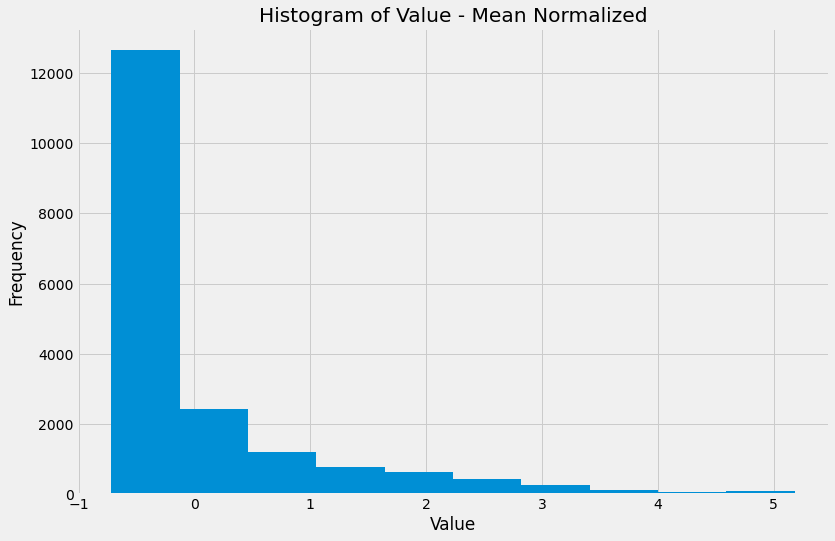

In [50]:
plt.hist((pollution['Value'] - pollution['Value'].mean())/pollution['Value'].std())
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Mean Normalized')
plt.show()

**Min-Max Normalization**

`normalized_df=(df-df.min())/(df.max()-df.min())`

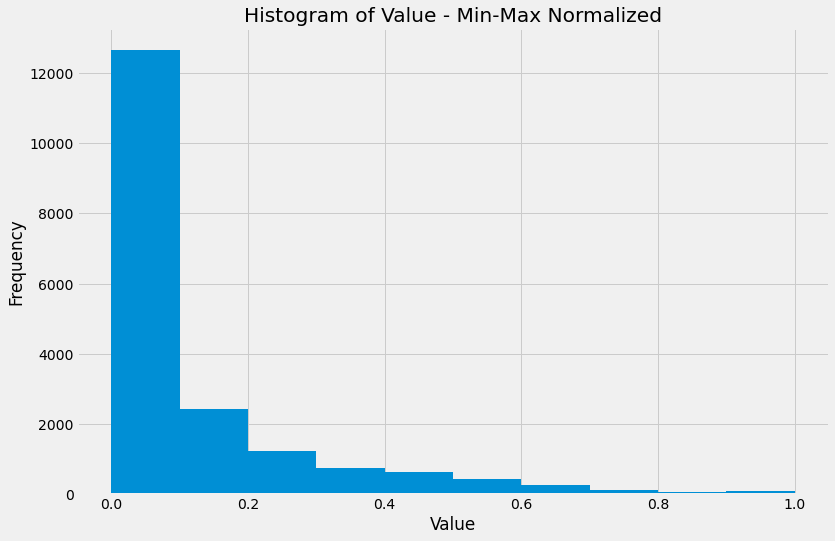

In [51]:
plt.hist((pollution['Value'] - pollution['Value'].min())/(pollution['Value'].max() - pollution['Value'].min()))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Min-Max Normalized')
plt.show()

## Duplicate Data

In [53]:
pollution.duplicated()

Date (LST)
2015-10-01 00:00:00    False
2015-10-01 01:00:00    False
2015-10-01 02:00:00    False
2015-10-01 03:00:00    False
2015-10-01 04:00:00    False
                       ...  
2018-01-31 19:00:00    False
2018-01-31 20:00:00    False
2018-01-31 21:00:00    False
2018-01-31 22:00:00    False
2018-01-31 23:00:00    False
Length: 18679, dtype: bool

In [78]:
pollution[pollution.duplicated(subset=['Date'])]

,Parameter,Date,Year,Month,Day,Hour,Date Key,Value,Unit,AQI,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
Date (LST),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-01 09:00:00,2/5/2018 12:00,2016-03-01 09:00:00,2016,3,1,9,2.020000e+11,0.247,mg/mÂ³,297.0,442920.0,99999.0,2.020000e+11,240.0,11.0,NaN,250.0,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,1019.2,29.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-27 03:00:00,2/5/2018 12:00,2016-03-27 03:00:00,2016,3,27,2,2.020000e+11,0.050,mg/mÂ³,137.0,442920.0,99999.0,2.020000e+11,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,46.0,18.0,1013.1,29.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 14:00:00,2/5/2018 12:00,2017-01-05 14:00:00,2017,1,5,14,2.020000e+11,0.090,mg/mÂ³,169.0,442920.0,99999.0,2.020000e+11,0.0,2.0,NaN,722.0,1.0,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.0,-18.0,NaN,30.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 15:00:00,2/5/2018 12:00,2017-01-05 15:00:00,2017,1,5,15,2.020000e+11,0.060,mg/mÂ³,153.0,442920.0,99999.0,2.020000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-3.0,-7.0,1042.6,NaN,874.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 15:00:00,2/5/2018 12:00,2017-01-05 15:00:00,2017,1,5,15,2.020000e+11,0.060,mg/mÂ³,153.0,442920.0,99999.0,2.020000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-3.0,-7.0,1042.6,NaN,874.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-06 09:00:00,2/5/2018 12:00,2017-01-06 09:00:00,2017,1,6,9,2.020000e+11,0.324,mg/mÂ³,360.0,442920.0,99999.0,2.020000e+11,170.0,7.0,NaN,722.0,1.0,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-6.0,-11.0,1042.0,30.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 09:00:00,2/5/2018 12:00,2017-01-06 09:00:00,2017,1,6,9,2.020000e+11,0.324,mg/mÂ³,360.0,442920.0,99999.0,2.020000e+11,170.0,7.0,NaN,722.0,1.0,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-6.0,-11.0,1042.0,30.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 09:00:00,2/5/2018 12:00,2017-01-06 09:00:00,2017,1,6,9,2.020000e+11,0.324,mg/mÂ³,360.0,442920.0,99999.0,2.020000e+11,170.0,7.0,NaN,722.0,1.0,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-6.0,-11.0,1042.0,30.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pollution = pollution.drop_duplicates(subset=['Date'])

In [57]:
pollution = pollution.reset_index(drop=True)

In [58]:
pollution

,Parameter,Date,Year,Month,Day,Hour,Date Key,Value,Unit,AQI,USAF,WBAN,Date Key.1,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW_1,MW_2,MW_3,AW,AW_4,AW_5,AW_6,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,2/5/2018 12:00,2015-10-01 00:00:00,2015,1,1,0,2.020000e+11,0.176,mg/m³,50.0,442920.0,99999.0,2.020000e+11,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,12.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,35.0,23.0,1022.4,30.00,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
1,2/5/2018 12:00,2015-10-01 01:00:00,2015,1,1,1,2.020000e+11,0.071,mg/m³,60.0,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,250.0,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/5/2018 12:00,2015-10-01 02:00:00,2015,1,1,2,2.020000e+11,0.077,mg/m³,70.0,442920.0,99999.0,2.020000e+11,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,27.0,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/5/2018 12:00,2015-10-01 03:00:00,2015,1,1,3,2.020000e+11,0.058,mg/m³,80.0,442920.0,99999.0,2.020000e+11,210.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,31.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,29.0,1017.0,NaN,867.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/5/2018 12:00,2015-10-01 04:00:00,2015,1,1,4,2.020000e+11,0.056,mg/m³,90.0,442920.0,99999.0,2.020000e+11,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,30.0,NaN,29.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,2/5/2018 12:00,2018-01-31 19:00:00,2018,1,31,19,2.020000e+11,0.010,mg/mÂ³,42.0,442920.0,99999.0,2.020000e+11,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,-22.0,NaN,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,2/5/2018 12:00,2018-01-31 20:00:00,2018,1,31,20,2.020000e+11,0.011,mg/mÂ³,46.0,442920.0,99999.0,2.020000e+11,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.0,-29.0,NaN,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,2/5/2018 12:00,2018-01-31 21:00:00,2018,1,31,21,2.020000e+11,0.009,mg/mÂ³,38.0,442920.0,99999.0,2.020000e+11,170.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.0,-33.0,1047.6,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18551,2/5/2018 12:00,2018-01-31 22:00:00,2018,1,31,22,2.020000e+11,0.011,mg/mÂ³,46.0,442920.0,99999.0,2.020000e+11,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.0,-35.0,NaN,30.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
pollution = pollution.sort_values('Date').reset_index(drop=True)

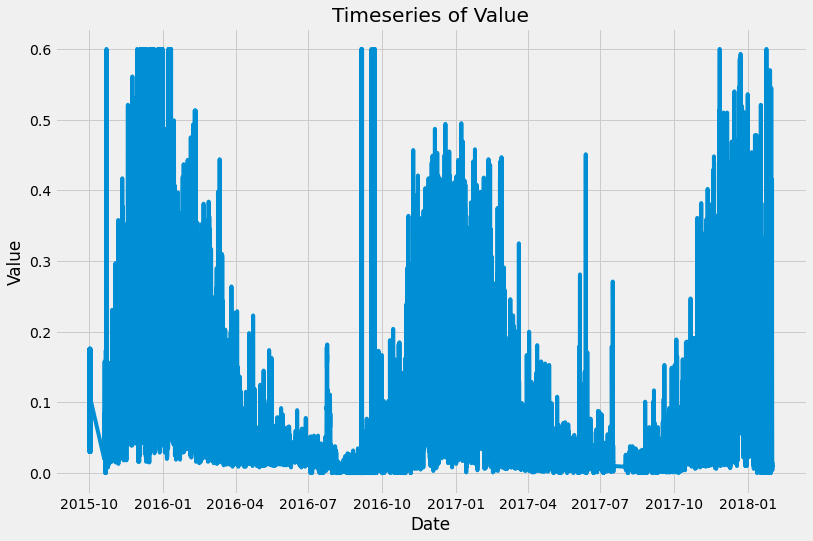

In [61]:
plt.plot(pollution['Date'], pollution['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Timeseries of Value')
plt.show()